In [10]:
import os
import json

import matplotlib.pyplot as plt

In [11]:

with open("./experiment_prm_conf_nogen.json", "r", encoding="utf-8") as f:
    output_data = json.load(f)

In [15]:
confidences = [o['confidence'] for o in output_data]
success_probs = [o['success_prob'] for o in output_data]
reasoning_prefix = [o['reasoning_prefix'] for o in output_data]

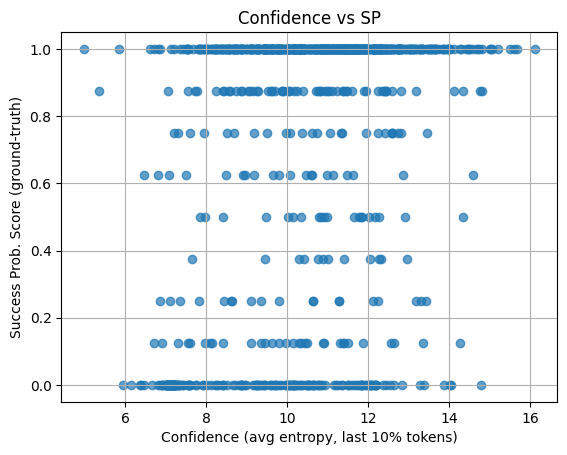

In [17]:
plt.figure()
plt.scatter(confidences, success_probs, alpha=0.7)
plt.xlabel("Confidence (avg entropy, last 10% tokens)")
plt.ylabel("Success Prob. Score (ground-truth)")
plt.title("Confidence vs SP")
plt.grid(True)
plt.show()

In [18]:
import numpy as np

In [19]:
np.corrcoef(confidences, success_probs)[0, 1]

np.float64(0.30439872442004523)

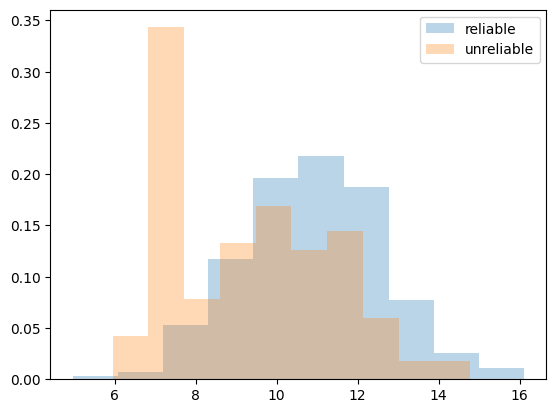

In [24]:
confidences = np.array(confidences)
success_probs = np.array(success_probs)

reliable_idx = success_probs > 0.9
unreliable_idx = success_probs < 0.1

plt.figure()
plt.hist(confidences[reliable_idx], density=True, alpha=0.3, label="reliable")
plt.hist(confidences[unreliable_idx], density=True, alpha=0.3, label="unreliable")
plt.legend()
plt.show()